<a href="https://colab.research.google.com/github/Sriram-create/24BAD115-Machine-Learning-/blob/main/Scenario1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score


In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sohier/calcofi")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'calcofi' dataset.
Path to dataset files: /kaggle/input/calcofi


In [6]:
df = pd.read_csv("/kaggle/input/calcofi/bottle.csv")

/tmp/ipython-input-1193668882.py:1: DtypeWarning: Columns (47,73) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/kaggle/input/calcofi/bottle.csv")


In [10]:
features = ['Depthm', 'Salnty', 'O2ml_L']
target = 'T_degC'


In [11]:
df = df[features + [target]]

In [12]:
df.fillna(df.mean(), inplace=True)

/tmp/ipython-input-820435583.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna(df.mean(), inplace=True)


In [13]:
X = df[features]
y = df[target]

In [14]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [16]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [17]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [18]:
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)

MSE: 6.2214468826180624
RMSE: 2.4942828393384064
R2 Score: 0.6492792001567064


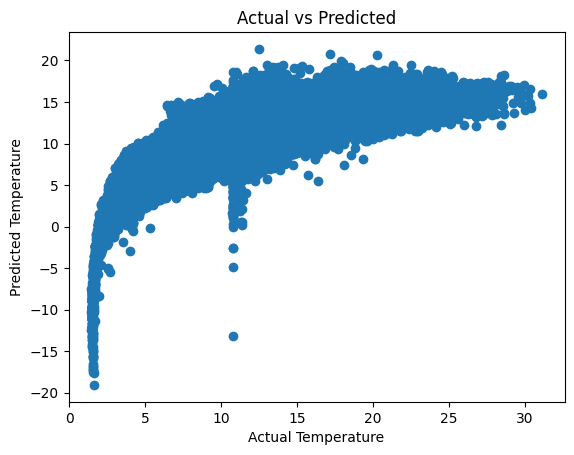

In [19]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Temperature")
plt.ylabel("Predicted Temperature")
plt.title("Actual vs Predicted")
plt.show()

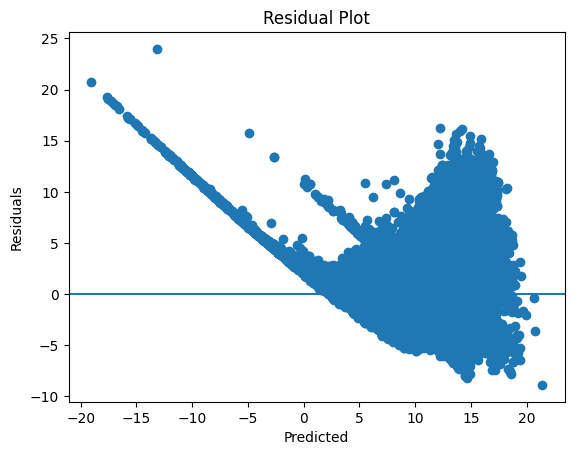

In [20]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(0)
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

In [21]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)


Ridge()

In [22]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)

Lasso(alpha=0.01)